### 3D Collection of Points

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.fft import fftn, fftfreq
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [78]:
#grid
min,max=0,1
size=11
x=np.linspace(min,max,size)
y=np.linspace(min,max,size)
z=np.linspace(min,max,size)
delta=x[1]-x[0]
X,Y,Z=np.meshgrid(x,y,z,indexing='ij')

#points
N=1000
points=np.random.rand(N,3)
#'''
#to specify the grid boundaries
points[:,0]*=max
points[:,1]*=max
points[:,2]*=max
#'''
grid_points = np.vstack([X.ravel(), Y.ravel(), Z.ravel()]).T

### Interpolating on a Grid
- Interpolation involves estimating values between known data points, in this case I want to interpolate the 3D points onto a grid.

### NGP/CIC Interpolation
- NGP stands for *Nearest Grid Point* and CIC stands for *Cloud-in-Cell*.

   - **Nearest Grid Point (NGP):** Each point is assigned to the grid point closest to it.
  
   - **Cloud-in-Cell (CIC):** This method assigns each particle's contribution to the surrounding grid cells, weighting according to its proximity. It's more accurate than NGP but computationally more expensive.

In [79]:
#NGP
ngp_values=np.zeros_like(X)
for point in points:
    #for each point I have to calculate the index of the nearest grid point in the ngp_values array
    idx=tuple(np.round((point/max)*(size-1)).astype(int))
    #now I have to increment the value at the calculated index in the ngp_values array by 1
    ngp_values[idx]+=1

In [80]:
#CIC
cic_values=np.zeros_like(X)
for point in points:
    #for each point I have to calculate the indices of the grid cells containing the point's contributions using a scaling factor of (grid_size - 1) / 10
    idxs=np.floor((point/max)*(size-1)).astype(int)
    #now I have to calculate the weights for distributing the point's contribution to the surrounding grid cells
    weights=1-np.abs((point/max)*(size-1)-idxs)
    for i in range(2):
        for j in range(2):
            for k in range(2):
                #I have to calculate the indices of the neighboring grid cells
                idx=tuple(np.clip(idxs+[i,j,k],0,size-1))
                #now I have to distribute the point's contribution to the surrounding grid cells based on the calculated weights
                cic_values[idx]+=weights[i]*weights[j]*weights[k]

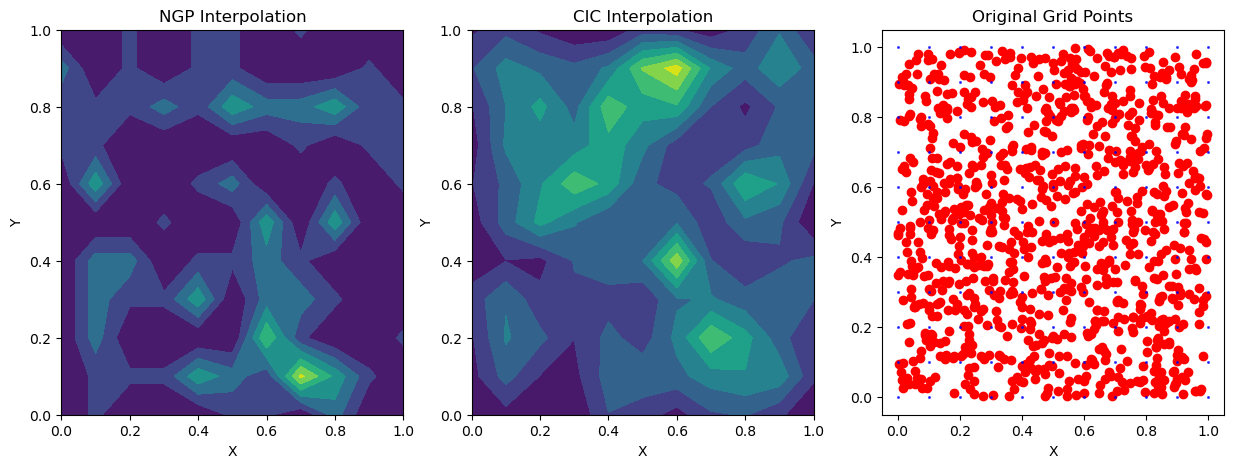

In [81]:
#plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax in axes:
    ax.scatter(points[:, 0], points[:, 1], c='r')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

#NGP interpolation
axes[0].contourf(X[:, :, 0], Y[:, :, 0], ngp_values[:, :, size//2])
axes[0].set_title('NGP Interpolation')

#CIC interpolation
axes[1].contourf(X[:, :, 0], Y[:, :, 0], cic_values[:, :, size//2])
axes[1].set_title('CIC Interpolation')

#original grid points
axes[2].scatter(grid_points[:, 0], grid_points[:, 1], c='b', s=1, alpha=0.1)
axes[2].set_title('Original Grid Points')

plt.show()

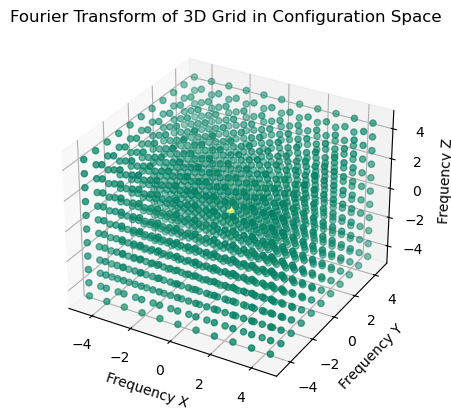

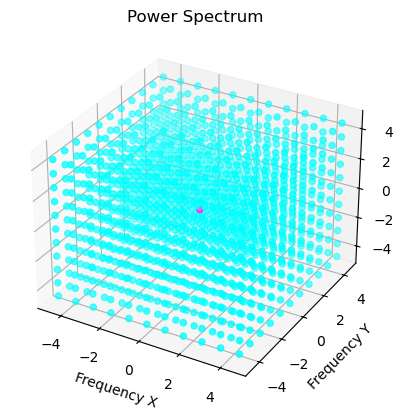

In [82]:
'''
fourier_transform=fftn(ngp_values)
frequency_x,frequency_y,frequency_z=fftfreq(size,delta),fftfreq(size,delta),fftfreq(size,delta)

freq_X, freq_Y, freq_Z = np.meshgrid(frequency_x, frequency_y, frequency_z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(freq_X, freq_Y, freq_Z, c=np.abs(fourier_transform), cmap='summer')
ax.set_xlabel('Frequency X')
ax.set_ylabel('Frequency Y')
ax.set_zlabel('Frequency Z')
ax.set_title('Fourier Transform of 3D Grid in Configuration Space')
plt.show()

power_spectrum=np.abs(fourier_transform)**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(freq_X, freq_Y, freq_Z, c=power_spectrum, cmap='cool')
ax.set_xlabel('Frequency X')
ax.set_ylabel('Frequency Y')
ax.set_zlabel('Frequency Z')
ax.set_title('Power Spectrum')
plt.show()
'''

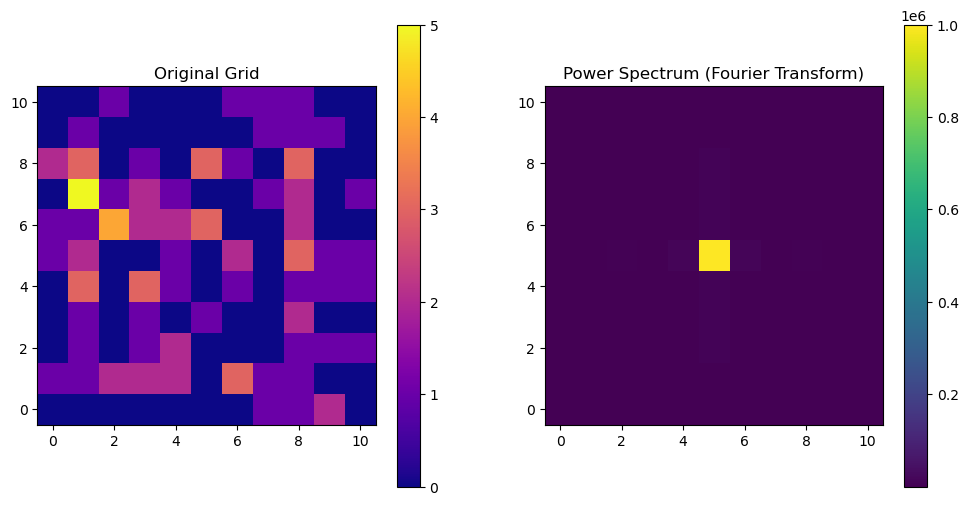

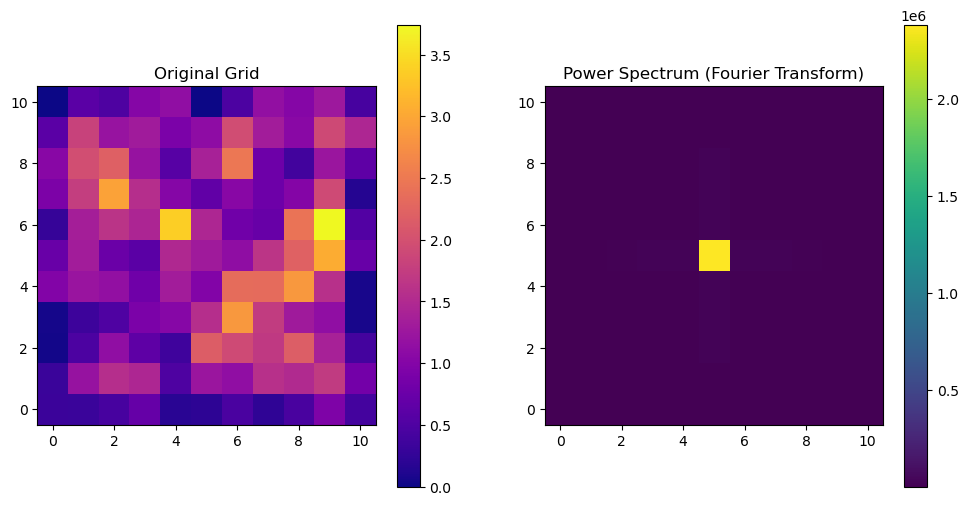

In [87]:
fft_ngp = np.fft.fftn(ngp_values)
power_spectrum_ngp = np.abs(fft_ngp)**2

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

im0 = axes[0].imshow(ngp_values[:, :, size//2], cmap='plasma', origin='lower')
axes[0].set_title('Original Grid')
plt.colorbar(im0, ax=axes[0])

im1 = axes[1].imshow(np.fft.fftshift(power_spectrum_ngp)[:, :, size//2], cmap='viridis', origin='lower')
axes[1].set_title('Power Spectrum (Fourier Transform)')
plt.colorbar(im1, ax=axes[1])

plt.show()

fft_cic = np.fft.fftn(cic_values)
power_spectrum_cic = np.abs(fft_cic)**2

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

im0 = axes[0].imshow(cic_values[:, :, size//2], cmap='plasma', origin='lower')
axes[0].set_title('Original Grid')
plt.colorbar(im0, ax=axes[0])

im1 = axes[1].imshow(np.fft.fftshift(power_spectrum_cic)[:, :, size//2], cmap='viridis', origin='lower')
axes[1].set_title('Power Spectrum (Fourier Transform)')
plt.colorbar(im1, ax=axes[1])

plt.show()